# Modeling Logic Gates Using Perceptrons

In this project, we will use perceptrons to model the fundamental building blocks of computers — logic gates.

## Introduction

We’ll explore how perceptrons can be used to mimic logic gates such as AND, OR, and XOR. This project will:
- Train perceptrons to learn linearly separable gates like AND and OR.
- Investigate why XOR, which isn’t linearly separable, fails with a single-layer perceptron.
- Visualize decision boundaries and distances from the boundary using a heat map.

## Logic Gate Tables

### AND Gate
| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 0      |
| 1       | 0       | 0      |
| 1       | 1       | 1      |

### XOR Gate
| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

We’ll visualize decision boundaries and explore the perceptron’s behavior when trained on these gates.

In [25]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## Training Perceptrons for Logic Gates

We will train perceptrons to learn the behavior of AND, OR, and XOR gates. Each gate will have its own dataset and labels.


In [26]:
# Input data
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


### Training the Perceptron

We’ll train the perceptron on different gates and visualize the decision boundary.


In [27]:
# Train and evaluate perceptron
def train_perceptron(labels, title):
    classifier = Perceptron(max_iter=40, random_state=22)
    classifier.fit(data, labels)
    
    # Accuracy
    accuracy = classifier.score(data, labels)
    print(f"Accuracy of the perceptron on the {title}: {accuracy:.2f}")
    
    # Predictions
    print(f"Testing {title} predictions:")
    for x in data:
        print(f"Input: {x}, Predicted Output: {classifier.predict([x])[0]}")
    
    return classifier

# Example: Train on AND gate
and_labels = np.array([0, 0, 0, 1])
visualize_data(and_labels, "AND Gate")
and_classifier = train_perceptron(and_labels, "AND Gate")


Accuracy of the perceptron on the AND Gate: 1.00
Testing AND Gate predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


### Visualizing the Decision Boundary

We’ll use a heat map to visualize the distances from the decision boundary for each gate.


Accuracy of the perceptron on the AND Gate: 1.00
Testing AND Gate predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


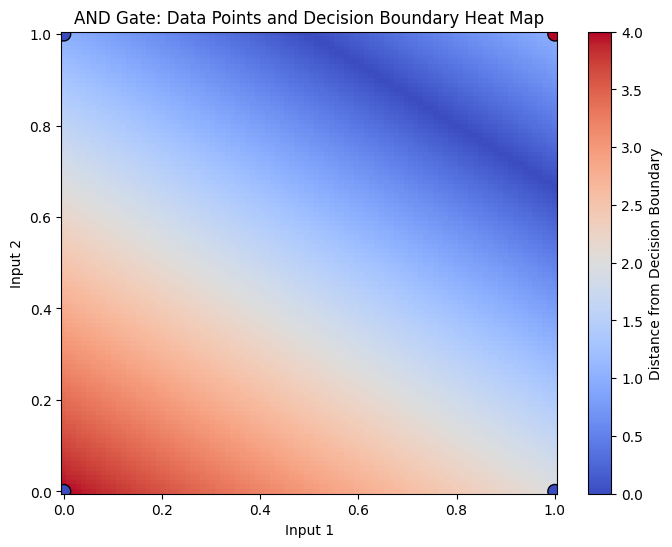

In [28]:
# Combined visualization of data points and heat map
def visualize_data_and_heatmap(classifier, labels, title):
    # Create heat map grid
    x_values = np.linspace(0, 1, 100)
    y_values = np.linspace(0, 1, 100)
    point_grid = list(product(x_values, y_values))
    distances = classifier.decision_function(point_grid)
    abs_distances = [abs(distance) for distance in distances]
    distances_matrix = np.reshape(abs_distances, (100, 100))
    
    # Plot heat map
    plt.figure(figsize=(8, 6))
    heatmap = plt.pcolormesh(x_values, y_values, distances_matrix, shading='auto', cmap='coolwarm')
    plt.colorbar(heatmap, label='Distance from Decision Boundary')
    
    # Overlay scatter plot
    plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels, edgecolor='black', cmap='coolwarm', s=100)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title(f"{title}: Data Points and Decision Boundary Heat Map")
    plt.show()

# Example: Visualize AND Gate
and_labels = np.array([0, 0, 0, 1])
and_classifier = train_perceptron(and_labels, "AND Gate")
visualize_data_and_heatmap(and_classifier, and_labels, "AND Gate")



### Experimenting with OR and XOR Gates

Change the labels to represent OR and XOR gates. Observe how the decision boundary changes and why the perceptron fails for XOR.


Accuracy of the perceptron on the OR Gate: 1.00
Testing OR Gate predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


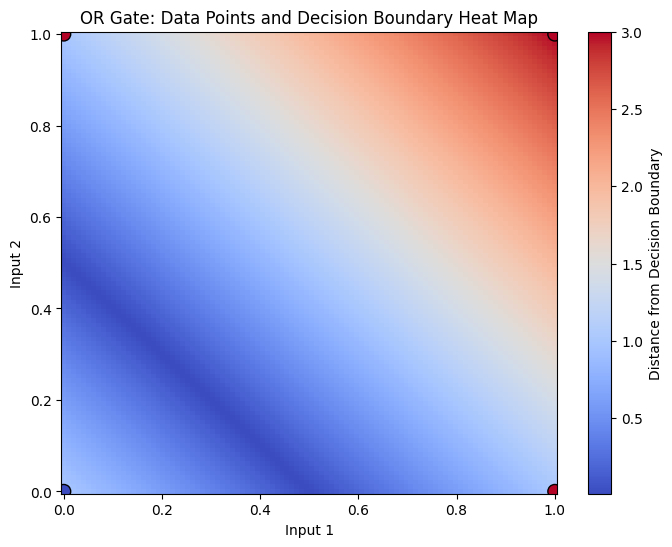

Accuracy of the perceptron on the XOR Gate: 0.50
Testing XOR Gate predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


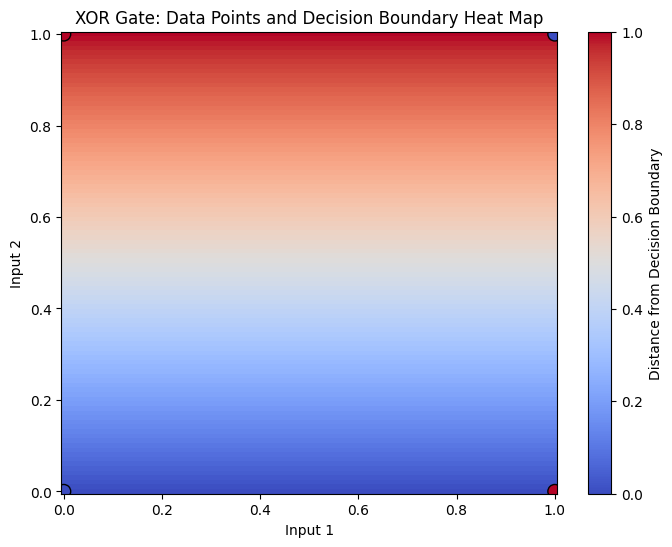

In [30]:
# OR Gate
or_labels = np.array([0, 1, 1, 1])
or_classifier = train_perceptron(or_labels, "OR Gate")
visualize_data_and_heatmap(or_classifier, or_labels, "OR Gate")

# XOR Gate
xor_labels = np.array([0, 1, 1, 0])
xor_classifier = train_perceptron(xor_labels, "XOR Gate")
visualize_data_and_heatmap(xor_classifier, xor_labels, "XOR Gate")



## Conclusion on Independent Separability

In this project, we explored the concept of linear separability using perceptrons to model basic logic gates such as AND, OR, and XOR. Through our experiments, we observed the following:

### Linearly Separable Data (AND and OR Gates)
- AND and OR gates are examples of linearly separable problems. A straight line (decision boundary) can successfully separate the data points into distinct classes.
- The perceptron, being a linear model, was able to learn these gates effectively, achieving perfect accuracy.

### Non-Linearly Separable Data (XOR Gate)
- XOR gate data is **not linearly separable**, meaning no straight line can divide the input space into the required classes.
- The perceptron failed to learn the XOR gate because it can only find linear decision boundaries. This limitation highlights the fundamental restriction of single-layer perceptrons when dealing with non-linearly separable problems.

### Key Insights
- The concept of linear separability is crucial for understanding the strengths and weaknesses of perceptrons.
- While simple problems can be solved by single-layer perceptrons, more complex, non-linear problems (like XOR) require more advanced architectures such as multi-layer perceptrons (MLPs) or neural networks with non-linear activation functions.

### Implications
- Linearly separable problems are computationally inexpensive and can be efficiently solved using perceptrons or linear classifiers.
- Non-linearly separable problems require **non-linear transformations** or **hidden layers** in neural networks to learn and generalize effectively.

---

In conclusion, the exploration of linear separability demonstrates the foundational concepts of machine learning and paves the way for more sophisticated models that overcome the limitations of perceptrons, ultimately enabling us to solve complex real-world problems.
